In [1]:
import pandas as pd
import numpy as np

In [2]:
# df_pathway_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
df_pathway_att = pd.read_csv('../../data/TransMCA_Pathway_Attention_lung_CellBlind_GEP_V2.csv')

df_pathway_att = df_pathway_att[df_pathway_att['cell_line'].isin(['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)
df_pathway_att.head()

(2560, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,5-Fluorouracil,HCC827,LUAD,0.001330,0.002133,0.001278,0.001523,0.001472,0.001580,0.001249,...,0.001668,0.001668,0.001440,0.001736,0.001223,0.001608,0.001578,0.001471,0.002139,0.001453
1,5-azacytidine,HCC827,LUAD,0.001296,0.002275,0.001074,0.001551,0.001249,0.001387,0.001061,...,0.001516,0.001729,0.001214,0.001631,0.001060,0.001426,0.001619,0.001248,0.002282,0.001462
2,A-366,HCC827,LUAD,0.001585,0.002365,0.001349,0.001781,0.001311,0.001290,0.001360,...,0.001273,0.001920,0.001316,0.001259,0.001380,0.001285,0.001834,0.001311,0.002371,0.001712
3,ABT737,HCC827,LUAD,0.001464,0.002022,0.001198,0.001639,0.001292,0.001385,0.001202,...,0.001474,0.001746,0.001269,0.001552,0.001221,0.001412,0.001681,0.001292,0.002025,0.001582
4,AGI-5198,HCC827,LUAD,0.001822,0.002040,0.001520,0.001891,0.001306,0.001217,0.001568,...,0.001155,0.001929,0.001335,0.001111,0.001627,0.001197,0.001906,0.001307,0.002042,0.001870


In [3]:
# 将df_LUNG根据cell_line分组，再取每组drug列的交集
df_pathway_att_drug = df_pathway_att.groupby('cell_line')['drug'].apply(set).reset_index()
# 将df_LUNG_drug中的drug取交集
drugs = set.intersection(*df_pathway_att_drug['drug'])
print(len(drugs))
print(drugs)
# 取df_LUNG中drug中在drugs中的数据
df_pathway_att = df_pathway_att[df_pathway_att['drug'].isin(drugs)]
# 去掉drug = ABT737,AZD5582,Dactinomycin,Docetaxel,GSK1904529A,Navitoclax,Paclitaxel,Sabutoclax,Venetoclax
# df_pathway_att = df_pathway_att[~df_pathway_att['drug'].isin(['ABT737','AZD5582','Dactinomycin','Docetaxel','GSK1904529A','Navitoclax','Paclitaxel','Sabutoclax','Venetoclax'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)

144
{'Veliparib', 'PD173074', 'PFI3', 'Lapatinib', 'BMS-345541', 'Paclitaxel', 'Doramapimod', 'Fulvestrant', 'Motesanib', 'PFI-1', 'I-BET-762', 'Luminespib', 'SN-38', '5-Fluorouracil', 'AZD5363', 'Afuresertib', 'EPZ5676', 'Bosutinib', 'JQ1', 'Cyclophosphamide', 'ABT737', 'Axitinib', 'MK-1775', 'Buparlisib', 'P22077', 'Temozolomide', 'Ribociclib', 'Linsitinib', 'Nilotinib', 'Sabutoclax', 'Staurosporine', 'Epirubicin', 'PRIMA-1MET', 'Pictilisib', 'CCT007093', 'Dinaciclib', 'Cediranib', 'Pevonedistat', 'RVX-208', 'WZ4003', 'GDC0810', 'Docetaxel', 'OF-1', 'Mirin', 'AGK2', 'SCH772984', 'I-BRD9', 'OTX015', 'Dasatinib', 'Talazoparib', 'MG-132', 'AZD6738', 'GW441756', 'PLX-4720', 'PD0325901', 'SB216763', 'JNK Inhibitor VIII', 'Alpelisib', 'Nutlin-3a (-)', 'Sepantronium bromide', 'Erlotinib', 'Selumetinib', 'AGI-5198', 'Serdemetan', 'RO-3306', 'NVP-ADW742', 'Navitoclax', 'LY2109761', 'Uprosertib', 'Leflunomide', 'WIKI4', 'Lestaurtinib', 'KU-55933', 'EPZ004777', 'Trametinib', 'GSK2606414', 'YK-4

In [4]:
# 取df_pathway_att前三列数据
df_pathway_att_OncotreeCode = df_pathway_att.iloc[:, :3]
# 去掉第一列数据
# df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop(['drug'], axis=1)
# 去重
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop_duplicates()
# 重置索引
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.reset_index(drop=True)
print(df_pathway_att_OncotreeCode.shape)
df_pathway_att_OncotreeCode.head()

(1728, 3)


,drug,cell_line,OncotreeCode
0,5-Fluorouracil,HCC827,LUAD
1,ABT737,HCC827,LUAD
2,AGI-5198,HCC827,LUAD
3,AGI-6780,HCC827,LUAD
4,AGK2,HCC827,LUAD


In [5]:
# 对df_pathway_att从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca = pca.transform(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca.shape

(1728, 2)

In [6]:
# 将降维后的数据转换成dataframe
df_pathway_att_pca = pd.DataFrame(df_pathway_att_pca)
df_pathway_att_pca.columns = ['pca_1', 'pca_2']
df_pathway_att_pca.insert(0, 'cell_line', df_pathway_att['cell_line'])
df_pathway_att_pca.insert(1, 'OncotreeCode', df_pathway_att['OncotreeCode'])
df_pathway_att_pca.insert(2, 'drug', df_pathway_att['drug'])
# 将pca_1>0.002的数据标注出来，方便后面的数据分析
df_pathway_att_pca['pca_1>0.002'] = df_pathway_att_pca['pca_1'].apply(lambda x: 1 if x>0.002 else 0)
print(df_pathway_att_pca.shape)
df_pathway_att_pca.head()

(1728, 6)


,cell_line,OncotreeCode,drug,pca_1,pca_2,pca_1>0.002
0,HCC827,LUAD,5-Fluorouracil,0.001343,0.001182,0
1,HCC827,LUAD,ABT737,0.001049,0.001216,0
2,HCC827,LUAD,AGI-5198,0.004743,-0.000356,1
3,HCC827,LUAD,AGI-6780,0.003701,0.000234,1
4,HCC827,LUAD,AGK2,0.003857,-0.000258,1


In [16]:
# 将df_pathway_att_pca与df_pathway_att_OncotreeCode合并,按照index
# df_pathway_att_pca = pd.concat([df_pathway_att_pca, df_pathway_att_OncotreeCode], axis=1)
# print(df_pathway_att_pca.shape)
# df_pathway_att_pca.head()

In [7]:
# 设置颜色
# ['#984EA3','#FF7F00','#E41A1C','#4DAF4A','#377EB8']
# 设置颜色方案
palette = {'LUAD':'#377EB8', 
           'LCLC':'#FF7F00', 
           # 'NSCLC':'#4DAF4A',
           'LUSC':'#984EA3',
           'SCLC':'#E41A1C'}
# palette = {'LUAD':'#b9f2f0', 
#            'LCLC':'#d0bbff', 
#            'NSCLC':'#ff9f9b',
#            'LUSC':'#a6d854',
#            'SCLC':'#66c2a5'}

In [8]:
# 将df_pathway_att_pca的OncotreeCode列的值替换成颜色
df_pathway_att_pca['OncotreeCode'] = df_pathway_att_pca['OncotreeCode'].map(palette)

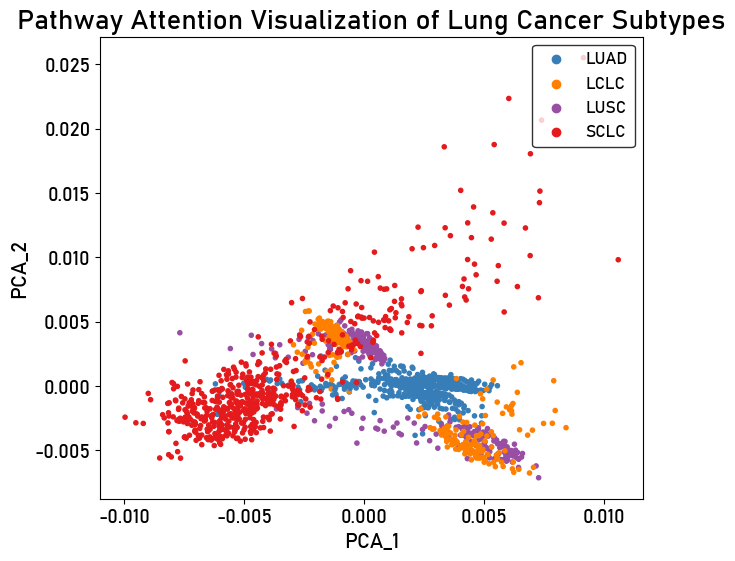

In [9]:
# 画出散点图，按照OncotreeCode进行着色
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 6))
plt.scatter(x=df_pathway_att_pca['pca_1'], y=df_pathway_att_pca['pca_2'], c=df_pathway_att_pca['OncotreeCode'], s=9)
# Get the current axes, creating one if necessary.
# ax = plt.gca()
# Set the spines (the box) visibility
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
# ax.spines['left'].set_linewidth(1)  # Y轴线宽
# ax.spines['bottom'].set_linewidth(1)
# 根据palette设置图例
for key, value in palette.items():
    plt.scatter([], [], c=value, label=key)
plt.legend(scatterpoints=1, frameon=True, labelspacing=0.5, loc='upper right', fontsize=12,edgecolor='black')


# title
plt.title('Pathway Attention Visualization of Lung Cancer Subtypes', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig('LUNG_pathway_attention_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

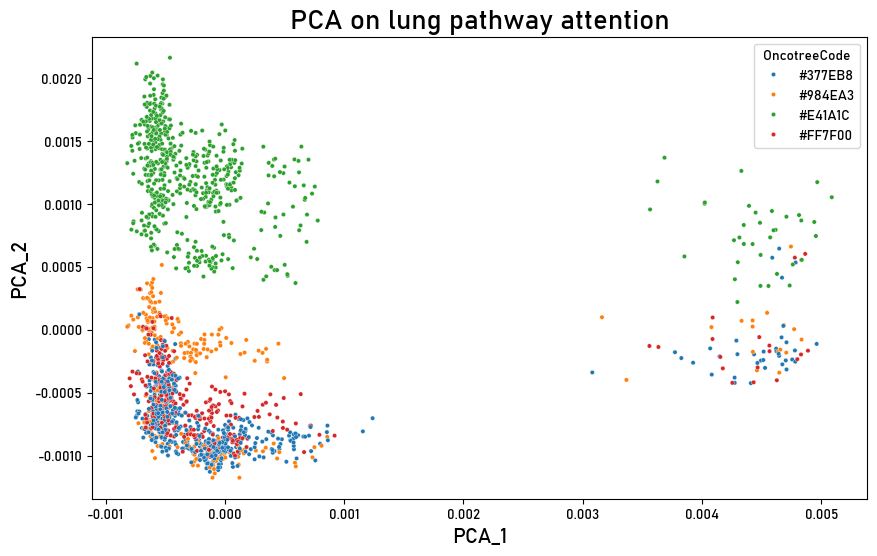

In [20]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='OncotreeCode', data=df_pathway_att_pca, s=10)
# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()